# **Analyzing the Misinterpretation of OPS**
* Goal:
  * Create a metric that defines the "balance" of a hitters OPS in terms of contribution of OBP and SLG
    * Based on the league average contributions of OBP and SLG to OPS

## **Step 1: Import Necessary Packages and Load Data**

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/2025BatterStats.csv') ## data updated as of 7-25-2025
df.head()

,Rk,Player,Age,Team,Lg,WAR,G,PA,AB,R,...,rOBA,Rbat+,TB,GIDP,HBP,SH,SF,IBB,Pos,Awards
0,1.0,Aaron Judge,33.0,NYY,AL,6.6,103.0,459.0,377.0,90.0,...,0.466,216,268.0,11.0,4.0,0.0,5.0,27.0,*9D/H,AS
1,2.0,Shohei Ohtani*,30.0,LAD,NL,4.5,110.0,508.0,431.0,102.0,...,0.412,166,260.0,5.0,3.0,0.0,2.0,13.0,*D/1,AS
2,3.0,Will Smith,30.0,LAD,NL,4.2,87.0,348.0,290.0,54.0,...,0.411,168,157.0,6.0,3.0,0.0,5.0,1.0,*2H,AS
3,4.0,Kyle Schwarber*,32.0,PHI,NL,3.7,111.0,493.0,410.0,77.0,...,0.410,157,237.0,1.0,9.0,0.0,0.0,5.0,*D/7,AS
4,5.0,Cal Raleigh#,28.0,SEA,AL,5.4,110.0,486.0,412.0,73.0,...,0.397,169,246.0,5.0,5.0,0.0,3.0,12.0,*2D/H,AS


## **Step 2: EDA and Cleaning**

In [ ]:
df.columns

Index(['Rk', 'Player', 'Age', 'Team', 'Lg', 'WAR', 'G', 'PA', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG',
       'OPS', 'OPS+', 'rOBA', 'Rbat+', 'TB', 'GIDP', 'HBP', 'SH', 'SF', 'IBB',
       'Pos', 'Awards'],
      dtype='object')

In [ ]:
#df['OPS'] = df['OPS▼']
#df.drop('OPS▼', axis=1, inplace=True)

In [ ]:
# drop list of unecessary vars
drop = ['Rk', 'Age', 'Lg', 'GIDP', 'HBP', 'SH', 'SF', 'IBB', 'Awards',
        'G', 'AB', 'rOBA', 'Rbat+', 'R', 'RBI', 'CS', 'SB', 'Pos']
df.drop(drop, axis=1, inplace=True)
df.head()

,Player,Team,WAR,PA,H,2B,3B,HR,BB,SO,BA,OBP,SLG,OPS,OPS+,TB
0,Aaron Judge,NYY,6.6,459.0,129.0,24.0,2.0,37.0,73.0,120.0,0.342,0.449,0.711,1.160,217,268.0
1,Shohei Ohtani*,LAD,4.5,508.0,118.0,14.0,7.0,38.0,71.0,136.0,0.274,0.379,0.603,0.982,171,260.0
2,Will Smith,LAD,4.2,348.0,94.0,19.0,1.0,14.0,50.0,66.0,0.324,0.422,0.541,0.964,170,157.0
3,Kyle Schwarber*,PHI,3.7,493.0,104.0,17.0,1.0,38.0,74.0,131.0,0.254,0.379,0.578,0.957,158,237.0
4,Cal Raleigh#,SEA,5.4,486.0,104.0,16.0,0.0,42.0,66.0,130.0,0.252,0.360,0.597,0.957,173,246.0


In [ ]:
# Cleaning player names
df['Player'] = df['Player'].str.replace(r'[*#%]', '', regex=True)
df.head()

,Player,Team,WAR,PA,H,2B,3B,HR,BB,SO,BA,OBP,SLG,OPS,OPS+,TB
0,Aaron Judge,NYY,6.6,459.0,129.0,24.0,2.0,37.0,73.0,120.0,0.342,0.449,0.711,1.160,217,268.0
1,Shohei Ohtani,LAD,4.5,508.0,118.0,14.0,7.0,38.0,71.0,136.0,0.274,0.379,0.603,0.982,171,260.0
2,Will Smith,LAD,4.2,348.0,94.0,19.0,1.0,14.0,50.0,66.0,0.324,0.422,0.541,0.964,170,157.0
3,Kyle Schwarber,PHI,3.7,493.0,104.0,17.0,1.0,38.0,74.0,131.0,0.254,0.379,0.578,0.957,158,237.0
4,Cal Raleigh,SEA,5.4,486.0,104.0,16.0,0.0,42.0,66.0,130.0,0.252,0.360,0.597,0.957,173,246.0


In [ ]:
# grabbing mlb averages and making df
mlb_average = df[df['Player'] == "MLB Average"]
mlb_average

,Player,Team,WAR,PA,H,2B,3B,HR,BB,SO,BA,OBP,SLG,OPS,OPS+,TB
110,MLB Average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.246,0.316,0.402,0.718,100,NaN


In [ ]:
# Filtering to players with greater than 50 PA
df = df[df['PA'] >= 50]

In [ ]:
# Top 5 OPS
df.sort_values(by = "OPS", ascending = False).head()

,Player,Team,WAR,PA,H,2B,3B,HR,BB,SO,BA,OBP,SLG,OPS,OPS+,TB
0,Aaron Judge,NYY,6.6,459.0,129.0,24.0,2.0,37.0,73.0,120.0,0.342,0.449,0.711,1.160,217,268.0
1,Shohei Ohtani,LAD,4.5,508.0,118.0,14.0,7.0,38.0,71.0,136.0,0.274,0.379,0.603,0.982,171,260.0
2,Will Smith,LAD,4.2,348.0,94.0,19.0,1.0,14.0,50.0,66.0,0.324,0.422,0.541,0.964,170,157.0
3,Kyle Schwarber,PHI,3.7,493.0,104.0,17.0,1.0,38.0,74.0,131.0,0.254,0.379,0.578,0.957,158,237.0
4,Cal Raleigh,SEA,5.4,486.0,104.0,16.0,0.0,42.0,66.0,130.0,0.252,0.360,0.597,0.957,173,246.0


In [ ]:
# Top 5 SLG
df.sort_values(by = "SLG", ascending = False).head()

,Player,Team,WAR,PA,H,2B,3B,HR,BB,SO,BA,OBP,SLG,OPS,OPS+,TB
0,Aaron Judge,NYY,6.6,459.0,129.0,24.0,2.0,37.0,73.0,120.0,0.342,0.449,0.711,1.160,217,268.0
1,Shohei Ohtani,LAD,4.5,508.0,118.0,14.0,7.0,38.0,71.0,136.0,0.274,0.379,0.603,0.982,171,260.0
4,Cal Raleigh,SEA,5.4,486.0,104.0,16.0,0.0,42.0,66.0,130.0,0.252,0.360,0.597,0.957,173,246.0
3,Kyle Schwarber,PHI,3.7,493.0,104.0,17.0,1.0,38.0,74.0,131.0,0.254,0.379,0.578,0.957,158,237.0
5,Kyle Stowers,MIA,3.6,406.0,105.0,18.0,3.0,25.0,41.0,115.0,0.296,0.373,0.575,0.947,158,204.0


In [ ]:
# Top 5 OBP
df.sort_values(by = "OBP", ascending = False).head()

,Player,Team,WAR,PA,H,2B,3B,HR,BB,SO,BA,OBP,SLG,OPS,OPS+,TB
0,Aaron Judge,NYY,6.6,459.0,129.0,24.0,2.0,37.0,73.0,120.0,0.342,0.449,0.711,1.160,217,268.0
2,Will Smith,LAD,4.2,348.0,94.0,19.0,1.0,14.0,50.0,66.0,0.324,0.422,0.541,0.964,170,157.0
20,Vladimir Guerrero Jr.,TOR,3.6,491.0,120.0,24.0,0.0,16.0,68.0,67.0,0.289,0.395,0.463,0.858,138,192.0
13,Jonathan Aranda,TBR,3.1,409.0,113.0,22.0,0.0,12.0,40.0,102.0,0.316,0.394,0.478,0.871,143,171.0
6,Ketel Marte,ARI,3.2,346.0,85.0,15.0,0.0,21.0,46.0,50.0,0.288,0.390,0.553,0.943,158,163.0


## **Step 3: Variable Creation**

In [ ]:
# creating variables for league averages
league_avg_obp = mlb_average['OBP'].values[0]
league_avg_slg = mlb_average['SLG'].values[0]
league_avg_ops = mlb_average['OPS'].values[0]

# league average props of slg and ops
league_avg_prop_slg = round(league_avg_slg / (league_avg_slg + league_avg_obp),2)
league_avg_prop_obp = round(league_avg_obp / (league_avg_slg + league_avg_obp),2)

In [ ]:
print(f"League Average OBP: {league_avg_obp}\n")
print(f"League Average SLG: {league_avg_slg}\n")
print(f"League Average OPS: {league_avg_ops}\n")
print(f"League Average Prop of SLG in OPS: {league_avg_prop_slg}\n")
print(f"League Average Prop of OBP in OPS: {league_avg_prop_obp}\n")

League Average OBP: 0.316

League Average SLG: 0.402

League Average OPS: 0.718

League Average Prop of SLG in OPS: 0.56

League Average Prop of OBP in OPS: 0.44



In [ ]:
# Creating a separate df with above league average OPS players
df_above_avg = df[df['OPS'] > league_avg_ops]
df_above_avg.head()

,Player,Team,WAR,PA,H,2B,3B,HR,BB,SO,BA,OBP,SLG,OPS,OPS+,TB
0,Aaron Judge,NYY,6.6,459.0,129.0,24.0,2.0,37.0,73.0,120.0,0.342,0.449,0.711,1.160,217,268.0
1,Shohei Ohtani,LAD,4.5,508.0,118.0,14.0,7.0,38.0,71.0,136.0,0.274,0.379,0.603,0.982,171,260.0
2,Will Smith,LAD,4.2,348.0,94.0,19.0,1.0,14.0,50.0,66.0,0.324,0.422,0.541,0.964,170,157.0
3,Kyle Schwarber,PHI,3.7,493.0,104.0,17.0,1.0,38.0,74.0,131.0,0.254,0.379,0.578,0.957,158,237.0
4,Cal Raleigh,SEA,5.4,486.0,104.0,16.0,0.0,42.0,66.0,130.0,0.252,0.360,0.597,0.957,173,246.0


In [ ]:
# Creating z-scores
'''
df_above_avg = df_above_avg.copy()
df_above_avg['OBP_z'] = (df_above_avg['OBP'] - league_avg_obp) / (df_above_avg['OBP'].std())
df_above_avg['SLG_z'] = (df_above_avg['SLG'] - league_avg_slg) / (df_above_avg['SLG'].std())
df_above_avg['OPS_z'] = (df_above_avg['OPS'] - league_avg_ops) / (df_above_avg['OPS'].std())
df_above_avg.sort_values(by = 'OPS', ascending = False).head(10)
''';

In [ ]:
# Looking at OBP and SLG variance
print(f"SLG Variance for Above Average OPS Hitters: {round(df_above_avg['SLG'].var(),4)}")
print(f"OBP Variance for Above Average OPS Hitters: {round(df_above_avg['OBP'].var(),4)}")

SLG Variance for Above Average OPS Hitters: 0.003
OBP Variance for Above Average OPS Hitters: 0.0008


In [ ]:
# creating a variable for each player's OBP and SLG prop contribution to OPS
df_above_avg = df_above_avg.copy()
df_above_avg['OBP_prop'] = round(df_above_avg['OBP'] / (df_above_avg['OBP'] + df_above_avg['SLG']),4)
df_above_avg['SLG_prop'] = round(df_above_avg['SLG'] / (df_above_avg['OBP'] + df_above_avg['SLG']),4)
df_above_avg.head()

,Player,Team,WAR,PA,H,2B,3B,HR,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,OBP_prop,SLG_prop
0,Aaron Judge,NYY,6.6,459.0,129.0,24.0,2.0,37.0,73.0,120.0,0.342,0.449,0.711,1.160,217,268.0,0.3871,0.6129
1,Shohei Ohtani,LAD,4.5,508.0,118.0,14.0,7.0,38.0,71.0,136.0,0.274,0.379,0.603,0.982,171,260.0,0.3859,0.6141
2,Will Smith,LAD,4.2,348.0,94.0,19.0,1.0,14.0,50.0,66.0,0.324,0.422,0.541,0.964,170,157.0,0.4382,0.5618
3,Kyle Schwarber,PHI,3.7,493.0,104.0,17.0,1.0,38.0,74.0,131.0,0.254,0.379,0.578,0.957,158,237.0,0.3960,0.6040
4,Cal Raleigh,SEA,5.4,486.0,104.0,16.0,0.0,42.0,66.0,130.0,0.252,0.360,0.597,0.957,173,246.0,0.3762,0.6238


In [ ]:
# creating average OPS and OBP contributions by above average OPS hitters
above_avg_obp = round(df_above_avg['OBP'].mean(),3)
above_avg_slg = round(df_above_avg['SLG'].mean(),3)
print(f"Average OBP of Above Average OPS Hitters: {above_avg_obp}")
print(f"Average SLG of Above Average OPS Hitters: {above_avg_slg}")
above_avg_obp_prop = round(df_above_avg['OBP_prop'].mean(),2)
above_avg_slg_prop = round(df_above_avg['SLG_prop'].mean(),2)
print()
print(f"Average OBP Proportion of Above Average OPS Hitters: {above_avg_obp_prop}")
print(f"Average SLG Proportion of Above Average OPS Hitters: {above_avg_slg_prop}")

Average OBP of Above Average OPS Hitters: 0.343
Average SLG of Above Average OPS Hitters: 0.462

Average OBP Proportion of Above Average OPS Hitters: 0.43
Average SLG Proportion of Above Average OPS Hitters: 0.57


In [ ]:
# Creating an OPS balance metric based around SLG prop
## 0 = balanced hitter, + = SLG-heavy hitter, - = OBP-heavy hitter
df_above_avg['OPS_balance'] = round((df_above_avg['SLG_prop'] - above_avg_slg_prop)*100,3)
df_above_avg['OPS_balance'].describe()

,OPS_balance
count,110.000000
mean,0.287455
std,3.001615
min,-6.790000
25%,-1.692500
50%,0.290000
75%,2.085000
max,7.390000


In [ ]:
# top 10 most OBP-heavy hitters
df_above_avg.sort_values(by = 'OPS_balance', ascending = True).head(10)

,Player,Team,WAR,PA,H,2B,3B,HR,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,OBP_prop,SLG_prop,OPS_balance
108,Xavier Edwards,MIA,2.4,425.0,112.0,17.0,3.0,1.0,39.0,61.0,0.295,0.360,0.363,0.723,102,138.0,0.4979,0.5021,-6.79
100,J.P. Crawford,SEA,2.6,478.0,109.0,17.0,0.0,9.0,57.0,85.0,0.265,0.358,0.372,0.730,114,153.0,0.4904,0.5096,-6.04
96,Gavin Lux,CIN,-0.1,356.0,86.0,18.0,1.0,4.0,42.0,82.0,0.274,0.360,0.376,0.735,101,118.0,0.4891,0.5109,-5.91
70,TJ Friedl,CIN,2.4,464.0,106.0,16.0,2.0,10.0,54.0,70.0,0.271,0.374,0.399,0.773,111,156.0,0.4838,0.5162,-5.38
103,William Contreras,MIL,2.7,460.0,102.0,20.0,0.0,9.0,59.0,83.0,0.258,0.352,0.376,0.728,108,149.0,0.4835,0.5165,-5.35
79,Marcell Ozuna,ATL,1.2,424.0,80.0,11.0,0.0,15.0,72.0,95.0,0.233,0.364,0.395,0.759,114,136.0,0.4796,0.5204,-4.96
71,Nolan Schanuel,LAA,2.0,465.0,112.0,21.0,1.0,9.0,51.0,56.0,0.279,0.368,0.404,0.772,115,162.0,0.4767,0.5233,-4.67
46,Geraldo Perdomo,ARI,3.3,490.0,113.0,23.0,2.0,11.0,65.0,53.0,0.278,0.378,0.426,0.804,123,173.0,0.4701,0.5299,-4.01
104,Brice Turang,MIL,3.1,452.0,111.0,20.0,0.0,8.0,42.0,97.0,0.276,0.342,0.386,0.728,107,155.0,0.4698,0.5302,-3.98
109,Xander Bogaerts,SDP,1.9,449.0,107.0,24.0,0.0,7.0,44.0,69.0,0.270,0.339,0.383,0.722,101,152.0,0.4695,0.5305,-3.95


In [ ]:
# Top 10 most SLG-heavy hitters
df_above_avg.sort_values(by = 'OPS_balance', ascending = False).head(10)

,Player,Team,WAR,PA,H,2B,3B,HR,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,OBP_prop,SLG_prop,OPS_balance
22,Pete Crow-Armstrong,CHC,6.2,459.0,114.0,31.0,4.0,27.0,20.0,111.0,0.267,0.303,0.548,0.851,141,234.0,0.3561,0.6439,7.39
11,Eugenio Suárez,2TM,3.1,454.0,98.0,20.0,0.0,36.0,29.0,122.0,0.243,0.313,0.559,0.872,136,226.0,0.3589,0.6411,7.11
56,Junior Caminero,TBR,2.1,452.0,106.0,20.0,0.0,28.0,24.0,91.0,0.252,0.292,0.500,0.792,117,210.0,0.3687,0.6313,6.13
14,Corbin Carroll,ARI,3.2,427.0,94.0,19.0,14.0,22.0,37.0,104.0,0.247,0.323,0.543,0.866,135,207.0,0.3730,0.6270,5.70
4,Cal Raleigh,SEA,5.4,486.0,104.0,16.0,0.0,42.0,66.0,130.0,0.252,0.360,0.597,0.957,173,246.0,0.3762,0.6238,5.38
8,Byron Buxton,MIN,3.8,364.0,92.0,14.0,4.0,23.0,29.0,97.0,0.282,0.343,0.561,0.905,143,183.0,0.3794,0.6206,5.06
82,Agustín Ramírez,MIA,0.0,367.0,83.0,24.0,1.0,17.0,22.0,72.0,0.241,0.286,0.465,0.751,104,160.0,0.3808,0.6192,4.92
36,Riley Greene,DET,2.2,460.0,115.0,23.0,1.0,26.0,28.0,147.0,0.269,0.315,0.509,0.825,125,218.0,0.3823,0.6177,4.77
23,Hunter Goodman,COL,2.1,398.0,103.0,20.0,4.0,21.0,23.0,106.0,0.278,0.324,0.523,0.847,123,194.0,0.3825,0.6175,4.75
38,Seiya Suzuki,CHC,1.8,470.0,105.0,25.0,3.0,26.0,43.0,126.0,0.249,0.315,0.507,0.822,134,214.0,0.3832,0.6168,4.68


In [ ]:
# creating z scores for prop SLG (opposite is prop OBP)
df_above_avg = df_above_avg.copy()
df_above_avg['SLG_prop_z'] = (df_above_avg['SLG_prop'] - above_avg_slg_prop) / (df_above_avg['SLG_prop'].std())
df_above_avg.head()

,Player,Team,WAR,PA,H,2B,3B,HR,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,OBP_prop,SLG_prop,OPS_balance,SLG_prop_z
0,Aaron Judge,NYY,6.6,459.0,129.0,24.0,2.0,37.0,73.0,120.0,0.342,0.449,0.711,1.160,217,268.0,0.3871,0.6129,4.29,1.429231
1,Shohei Ohtani,LAD,4.5,508.0,118.0,14.0,7.0,38.0,71.0,136.0,0.274,0.379,0.603,0.982,171,260.0,0.3859,0.6141,4.41,1.469209
2,Will Smith,LAD,4.2,348.0,94.0,19.0,1.0,14.0,50.0,66.0,0.324,0.422,0.541,0.964,170,157.0,0.4382,0.5618,-0.82,-0.273186
3,Kyle Schwarber,PHI,3.7,493.0,104.0,17.0,1.0,38.0,74.0,131.0,0.254,0.379,0.578,0.957,158,237.0,0.3960,0.6040,3.40,1.132724
4,Cal Raleigh,SEA,5.4,486.0,104.0,16.0,0.0,42.0,66.0,130.0,0.252,0.360,0.597,0.957,173,246.0,0.3762,0.6238,5.38,1.792368


In [ ]:
# looking at dist of SLG prop z
df_above_avg['SLG_prop_z'].describe()

,SLG_prop_z
count,110.000000
mean,0.095767
std,1.000000
min,-2.262116
25%,-0.563863
50%,0.096615
75%,0.694626
max,2.462008


In [ ]:
# Creating variable to classify hitters based on their OPS_balance
# within + or - 1 SD: Balanced
# > + 1 SD: SLG-heavy
# < -1 SD: OBP-heavy
df_above_avg['Hitter Type'] = np.where(df_above_avg['SLG_prop_z'] > 1, 'Slug-heavy',
                                      np.where(df_above_avg['SLG_prop_z'] < -1, 'OB-heavy', 'Balanced'))
df_above_avg.head()

,Player,Team,WAR,PA,H,2B,3B,HR,BB,SO,...,OBP,SLG,OPS,OPS+,TB,OBP_prop,SLG_prop,OPS_balance,SLG_prop_z,Hitter Type
0,Aaron Judge,NYY,6.6,459.0,129.0,24.0,2.0,37.0,73.0,120.0,...,0.449,0.711,1.160,217,268.0,0.3871,0.6129,4.29,1.429231,Slug-heavy
1,Shohei Ohtani,LAD,4.5,508.0,118.0,14.0,7.0,38.0,71.0,136.0,...,0.379,0.603,0.982,171,260.0,0.3859,0.6141,4.41,1.469209,Slug-heavy
2,Will Smith,LAD,4.2,348.0,94.0,19.0,1.0,14.0,50.0,66.0,...,0.422,0.541,0.964,170,157.0,0.4382,0.5618,-0.82,-0.273186,Balanced
3,Kyle Schwarber,PHI,3.7,493.0,104.0,17.0,1.0,38.0,74.0,131.0,...,0.379,0.578,0.957,158,237.0,0.3960,0.6040,3.40,1.132724,Slug-heavy
4,Cal Raleigh,SEA,5.4,486.0,104.0,16.0,0.0,42.0,66.0,130.0,...,0.360,0.597,0.957,173,246.0,0.3762,0.6238,5.38,1.792368,Slug-heavy


In [ ]:
# dist of hitter type
df_above_avg['Hitter Type'].value_counts()

,count
Hitter Type,
Balanced,71
Slug-heavy,21
OB-heavy,18


In [ ]:
# creating obp_prop_diff and slg_prop_diff
df_above_avg['OBP_prop_diff'] = df_above_avg['OBP_prop'] - above_avg_obp_prop
df_above_avg['SLG_prop_diff'] = df_above_avg['SLG_prop'] - above_avg_slg_prop

## **Step 4: Data Visualization**

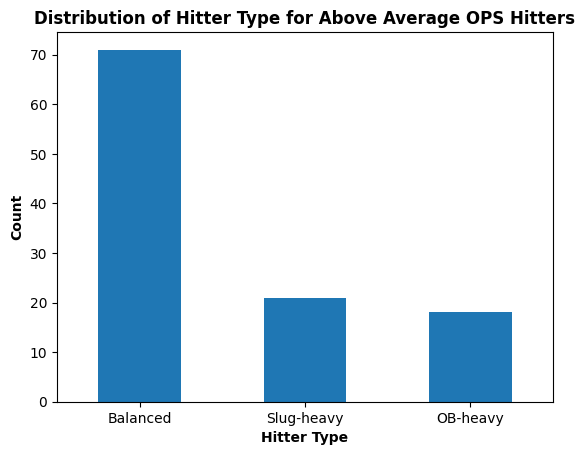

In [ ]:
# Plotting Hitter Type
import matplotlib.pyplot as plt
plt = df_above_avg['Hitter Type'].value_counts().plot(kind = 'bar');
plt.set_title("Distribution of Hitter Type for Above Average OPS Hitters", fontweight='bold')
plt.set_xlabel('Hitter Type', fontweight='bold')
plt.set_ylabel('Count', fontweight='bold')
plt.tick_params(axis='x', rotation=0)

In [ ]:
# defining a color map
color_map = {
    "OB-heavy": "#00cc96",
    "Slug-heavy": "#ef553b",
    "Balanced": "#636dfa"
}

In [ ]:
# pie chart for dist of hitter type with %
import plotly.express as px
hitter_type_counts = df_above_avg['Hitter Type'].value_counts().reset_index()
hitter_type_counts.columns = ['Hitter Type', 'Count']

fig = px.pie(hitter_type_counts, values='Count', names='Hitter Type',
             title="Distribution of Hitter Type for Above Average OPS Hitters",
             color_discrete_map=color_map)
fig.show()

In [ ]:
# pie chart for dist of hitter type with counts not %
hitter_type_counts = df_above_avg['Hitter Type'].value_counts().reset_index()
hitter_type_counts.columns = ['Hitter Type', 'Count']

fig = px.pie(hitter_type_counts, values='Count', names='Hitter Type',
             title="Distribution of Hitter Type for Above Average OPS Hitters",
             hole = 0.3,
             color_discrete_map=color_map)
fig.update_layout(title_x=0.5, legend=dict(x=1, y=0.5)) # Center the title and adjust legend position
fig.update_traces(textinfo='value') # Show count on slices
fig.show()
fig.write_html('HitterTypePiePlotly.html')

In [ ]:
# crosshair plot: OBP vs SLG for above average OPS hitters
import plotly.express as px
import plotly.io as pio

fig = px.scatter(df_above_avg, x="SLG", y="OBP", color="Hitter Type",
                 hover_name="Player", hover_data=['OBP', 'SLG', 'OPS'],
                 title="OBP vs SLG for Above-Average OPS Hitters",
                 template="presentation",
                 color_discrete_map=color_map)

fig.add_hline(y=above_avg_obp, line_dash="dash", line_color="gray")
fig.add_vline(x=above_avg_slg, line_dash="dash", line_color="gray")
fig.update_xaxes(tickformat=".3f")
fig.update_yaxes(tickformat=".3f")
fig.show()
fig.write_html('OPSvsSLGPlotly.html')

In [ ]:
# crosshair plot: OBP and SLG contributions in OPS
import plotly.express as px

fig = px.scatter(
    df_above_avg,
    x="SLG_prop_diff",
    y="OBP_prop_diff",
    color="OPS_balance",
    hover_name="Player",
    hover_data={'OBP': True, 'SLG': True, 'OPS': True,
                'SLG_prop_diff': False, 'OBP_prop_diff': False,
                'SLG_prop': True, 'OBP_prop': True},
    title= "Balance of OBP and SLG Contributions in OPS",
    labels={
        'SLG_prop_diff': 'SLG Prop Diff (Player – League)',
        'OBP_prop_diff': 'OBP Prop Diff (Player – League)',
        'OPS_balance': 'OPS Balance'
    },
    template="presentation",
    color_continuous_scale=[(0, "#00cc96"), (0.5, "#636dfa"), (1, "#ef553b")]
)

fig.add_hline(y=0, line_dash="dash", line_color="gray")
fig.add_vline(x=0, line_dash="dash", line_color="gray")

fig.update_coloraxes(colorbar_title="OPS Balance")
fig.show()

fig.write_html('OPSBalancePlotly.html')

In [ ]:
# select specific players to analyze
df[df['Player'] == 'Will Smith']

,Player,Team,WAR,PA,H,2B,3B,HR,BB,SO,BA,OBP,SLG,OPS,OPS+,TB
2,Will Smith,LAD,4.2,348.0,94.0,19.0,1.0,14.0,50.0,66.0,0.324,0.422,0.541,0.964,170,157.0
